# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [1]:
!ls


Lumber.ipynb      lumber-prices.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("lumber-prices.csv")
df

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00
...,...,...,...,...,...
295,$716.00,$825.60,$490.00,$621.20,2021-07-01T00:00:00
296,$623.10,$650.00,$448.00,$482.80,2021-08-02T00:00:00
297,$482.10,$659.70,$454.40,$627.50,2021-09-01T00:00:00
298,$637.10,$789.60,$588.50,$591.60,2021-10-01T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [4]:
df.date.min()

'1996-12-09T00:00:00'

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [5]:
df.max()

open                 $931.00
high                 $934.50
low                  $842.90
close                $995.60
date     2021-11-01T00:00:00
dtype: object

In [6]:
#The most recent date is 2021-11-01T00:00:00

## What 3 months had the highest high lumber price?

In [7]:
df.high.sort_values().head()
df.high = df.high.str.replace("$"," ").astype(float)
df.head()

/var/folders/n1/4svfr7bj3599pf0j1ss9dr5h0000gn/T/ipykernel_19741/2908838735.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.high = df.high.str.replace("$"," ").astype(float)


,open,high,low,close,date
0,$407.00,424.7,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,450.5,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,421.5,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,389.7,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,417.5,$376.50,$403.10,1997-04-01T00:00:00


In [8]:
df.low = df.low.str.replace("$"," ").astype(float)
df.close = df.close.str.replace("$"," ").astype(float)
df.open = df.open.str.replace("$"," ").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    300 non-null    float64
 1   high    300 non-null    float64
 2   low     300 non-null    float64
 3   close   300 non-null    float64
 4   date    300 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


/var/folders/n1/4svfr7bj3599pf0j1ss9dr5h0000gn/T/ipykernel_19741/2444977755.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace("$"," ").astype(float)
/var/folders/n1/4svfr7bj3599pf0j1ss9dr5h0000gn/T/ipykernel_19741/2444977755.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.close = df.close.str.replace("$"," ").astype(float)
/var/folders/n1/4svfr7bj3599pf0j1ss9dr5h0000gn/T/ipykernel_19741/2444977755.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.open = df.open.str.replace("$"," 

In [20]:
df.sort_values(by='high', ascending=False).head()

,open,high,low,close,date
293,1520.6,1711.2,1201.0,1309.5,2021-05-03T00:00:00
292,1012.6,1502.3,1006.0,1500.5,2021-04-01T00:00:00
294,1315.0,1380.0,705.0,716.0,2021-06-01T00:00:00
291,1000.0,1045.0,826.3,1009.1,2021-03-01T00:00:00
290,887.0,1030.4,842.9,995.6,2021-02-01T00:00:00


In [16]:
df.sort_values(ascending=False).head()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

## What 3 months had the lowest low lumber price?

In [25]:
df.sort_values(by='low')

,open,high,low,close,date
145,168.7,171.8,137.9,148.1,2009-01-02T00:00:00
146,158.1,175.9,138.0,147.0,2009-02-02T00:00:00
147,144.6,179.8,138.0,171.3,2009-03-02T00:00:00
149,160.0,201.2,150.7,191.7,2009-05-01T00:00:00
148,172.4,189.1,159.3,161.0,2009-04-01T00:00:00
...,...,...,...,...,...
294,1315.0,1380.0,705.0,716.0,2021-06-01T00:00:00
291,1000.0,1045.0,826.3,1009.1,2021-03-01T00:00:00
290,887.0,1030.4,842.9,995.6,2021-02-01T00:00:00
292,1012.6,1502.3,1006.0,1500.5,2021-04-01T00:00:00


## What is the median "high" lumber price in our dataset?

In [27]:
df.high.median()

329.65

## What is the median "low" lumber price in our dataset?

In [28]:
df.low.median()

286.1

## Plot the maximum "high" lumber price on an annual basis.

In [35]:
df.head()

,open,high,low,close,date
0,407.0,424.7,377.0,424.7,1996-12-09T00:00:00
1,426.0,450.5,395.0,411.4,1997-01-02T00:00:00
2,408.5,421.5,382.1,383.5,1997-02-03T00:00:00
3,386.0,389.7,355.0,380.5,1997-03-03T00:00:00
4,378.0,417.5,376.5,403.1,1997-04-01T00:00:00


In [37]:
df.date = pd.to_datetime(df.date)
df.head()

,open,high,low,close,date
0,407.0,424.7,377.0,424.7,1996-12-09
1,426.0,450.5,395.0,411.4,1997-01-02
2,408.5,421.5,382.1,383.5,1997-02-03
3,386.0,389.7,355.0,380.5,1997-03-03
4,378.0,417.5,376.5,403.1,1997-04-01


In [52]:
#df = pd.read_csv("apple.csv", parse_dates =["date"], index_col ="date")
#df = pd.read_csv("apple.csv", parse_dates =["date"], index_col ="date")
#weekly_resampled_data = df.open.resample('W').low.min()
#Quarterly_resampled_data = df.resample('Q').[column1].[operator]().
df.resample('A', on='date').high.max()


date
1996-12-31     424.7
1997-12-31     450.5
1998-12-31     345.4
1999-12-31     440.8
2000-12-31     360.5
2001-12-31     376.0
2002-12-31     329.8
2003-12-31     370.4
2004-12-31     464.0
2005-12-31     418.5
2006-12-31     376.4
2007-12-31     312.3
2008-12-31     270.3
2009-12-31     255.2
2010-12-31     327.5
2011-12-31     326.9
2012-12-31     392.8
2013-12-31     404.4
2014-12-31     373.0
2015-12-31     333.5
2016-12-31     345.7
2017-12-31     500.0
2018-12-31     659.0
2019-12-31     444.9
2020-12-31    1000.0
2021-12-31    1711.2
Freq: A-DEC, Name: high, dtype: float64

<AxesSubplot: xlabel='date'>

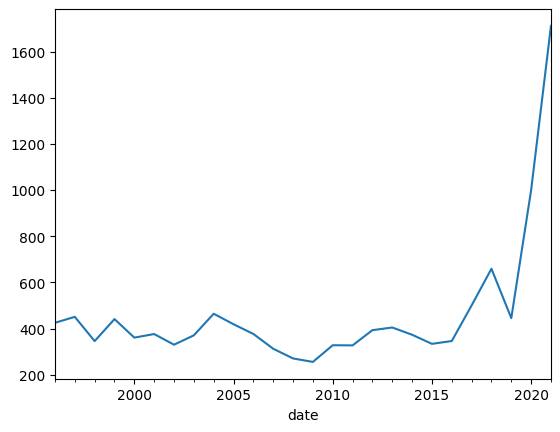

In [53]:
df.resample('A', on='date').high.max().plot()

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='date'>

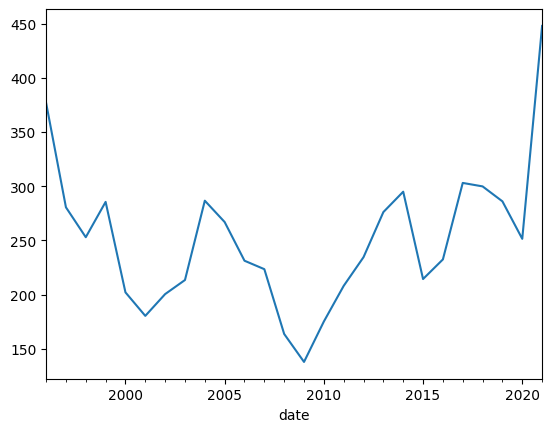

In [55]:
df.resample('A', on='date').low.min().plot()

In [ ]:
## Plot the median "close" lumber price on an quarterly basis.

<AxesSubplot: xlabel='date'>

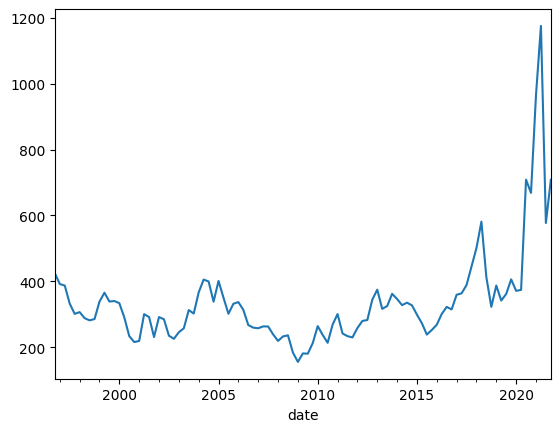

In [57]:
df.resample('Q', on='date').close.mean().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [61]:
df['difference'] = df.high - df.low
df.head()

,open,high,low,close,date,difference
0,407.0,424.7,377.0,424.7,1996-12-09,47.7
1,426.0,450.5,395.0,411.4,1997-01-02,55.5
2,408.5,421.5,382.1,383.5,1997-02-03,39.4
3,386.0,389.7,355.0,380.5,1997-03-03,34.7
4,378.0,417.5,376.5,403.1,1997-04-01,41.0


## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

## In 2020, how many months saw lumber prices rise vs lumber prices fall?

## In 2000, how many months saw lumber prices rise vs lumber prices fall?